### 2024/02/21 有効数字を調べる ⇒2進数換算で1/8 ～ 2048 まで15桁

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import math
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
import requests
from preprocessed_data_plusinfo import PreprocessedDataPlusInfo

In [14]:
columns = [ 'time', 'alpha', 'max_points', 'ptx_anoto', 'pty_anoto', 'shape_str',
                    'pressure_style', 'len_mm_acc', 'len_anoto', 'pressure_avg', 'shape_int']
def get_df(url):
    content = requests.get(url, auth=('19t2003a', 'ireneRED77')).content
    df = pd.read_table(io.StringIO(content.decode('utf-8')), header = None)
    df.columns = columns
    st_len_mm = [l*0.3 for l in df['len_anoto']]
    df['len_mm'] = st_len_mm
    # ストローク固有のidを付与
    df_reindex = df.reset_index()
    df_reindex = df_reindex.rename(columns={'index': 'stroke_id'})
    
    df = df_reindex.copy()
    x_list = []
    y_list = []
    for str_x, str_y in zip(df['ptx_anoto'], df['pty_anoto']):
        x_list.append([float(x) for x in str_x.split(',')])
        y_list.append([float(y) for y in str_y.split(',')])
    df['ptx_anoto_list'] = x_list
    df['pty_anoto_list'] = y_list
    df_coord = df
    return df_coord.copy()

In [30]:
df = get_df('http://skill.shinshu-u.ac.jp/i0zjtz/paper_bag_expert/20240209113801_18-4-0-0-0_strokes.txt/strokes/pointlists')

In [31]:
all_coord = []
for coords in df['ptx_anoto_list']:
    all_coord += coords
for coords in df['pty_anoto_list']:
    all_coord += coords

In [34]:
# 小数部のみのリスト
all_coord_dec = []

# 整数部のみのリスト
all_coord_inte = []

for value in all_coord:
    dec, inte  = math.modf(value)
    all_coord_dec.append(dec)
    all_coord_inte.append(inte)

1386.0

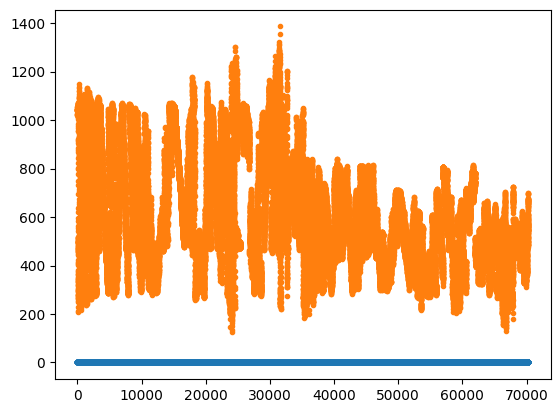

In [40]:
plt.scatter(range(len(all_coord_dec)), all_coord_dec, marker='.')
plt.scatter(range(len(all_coord_inte)), all_coord_inte, marker='.')


dec_unique = dict.fromkeys(all_coord_dec)
# dec_unique = dict.fromkeys(all_coord_dec)

# dec_unique
max(all_coord_inte)